In [1]:
import sys
sys.path.append("/Users/I546644/Personal/Unisinos/Codes/MoStress")

In [2]:
from os.path import join
import json
from moStress.neuralNetwork.MoStressNeuralNetwork import MoStressNeuralNetwork
from utils.preprocessingCheckpoint import getPreprocessingCheckpoint
from moStress.neuralNetwork.modelHandler.EvaluateModel import EvaluateModel

In [3]:
moStressJsonFilePath = join("..", "configs","moStressConfigs.json")

with open(moStressJsonFilePath, 'r') as j:
        moStressConfigs = json.loads(j.read())

In [4]:
trainData, validationData = getPreprocessingCheckpoint()

In [5]:
dataset = {
    "features": trainData["features"],
    "targets": trainData["targets"],
    "weights": trainData["weights"],
}

In [6]:
moStressNeuralNetwork = MoStressNeuralNetwork(moStressConfigs, dataset)

2022-09-07 21:09:13.134998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Starting MoStress with model architecture: REGULARIZER-LSTM and optimizer: rmsprop.


Creating model: REGULARIZER-LSTM

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 420, 128)          68608     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 420, 128)          0         
_________________________________________________________________
gaussian_noise (GaussianNois (None, 420, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 420, 128)          0         
_________________________________________________________________
flatten (Flatten)            (None, 53760)             0         
_________________________________________________________________
dense (Dense)                (None, 3)                 161283    
__

2022-09-07 21:10:46.308282: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-09-07 21:10:46.308325: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2022-09-07 21:10:46.312051: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.


Epoch 1/100
   1/3930 [..............................] - ETA: 4:29:56 - loss: 1.4003 - sparse_categorical_accuracy: 0.2500

2022-09-07 21:10:50.698390: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-09-07 21:10:50.698410: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.


   2/3930 [..............................] - ETA: 32:56 - loss: 1.5049 - sparse_categorical_accuracy: 0.2500  

2022-09-07 21:10:51.121877: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-09-07 21:10:51.488260: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.
2022-09-07 21:10:51.773429: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/REGULARIZER-LSTM/rmsprop/fit/20220907-211046/train/plugins/profile/2022_09_07_21_10_51

2022-09-07 21:10:51.942775: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/REGULARIZER-LSTM/rmsprop/fit/20220907-211046/train/plugins/profile/2022_09_07_21_10_51/C02D602YMD6Q.trace.json.gz
2022-09-07 21:10:52.120387: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/REGULARIZER-LSTM/rmsprop/fit/20220907-211046/train/plugins/profile/2022_09_07_21_10_51

2022-09-07 21:10:52.120687: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for mem

3930/3930 [==============================] - 1774s 451ms/step - loss: 1.3100 - sparse_categorical_accuracy: 0.7904 - val_loss: 0.1873 - val_sparse_categorical_accuracy: 0.9734

Epoch 00001: saving model to trainingCheckpoint/REGULARIZER-LSTM/rmsprop/cp.ckpt
Epoch 2/100
3930/3930 [==============================] - 1805s 459ms/step - loss: 0.4636 - sparse_categorical_accuracy: 0.9623 - val_loss: 0.1388 - val_sparse_categorical_accuracy: 0.9906

Epoch 00002: saving model to trainingCheckpoint/REGULARIZER-LSTM/rmsprop/cp.ckpt
Epoch 3/100
3930/3930 [==============================] - 1787s 455ms/step - loss: 0.2899 - sparse_categorical_accuracy: 0.9813 - val_loss: 0.0576 - val_sparse_categorical_accuracy: 0.9951

Epoch 00003: saving model to trainingCheckpoint/REGULARIZER-LSTM/rmsprop/cp.ckpt
Epoch 4/100
3930/3930 [==============================] - 1804s 459ms/step - loss: 0.2114 - sparse_categorical_accuracy: 0.9880 - val_loss: 0.0477 - val_sparse_categorical_accuracy: 0.9975

Epoch 00004: 

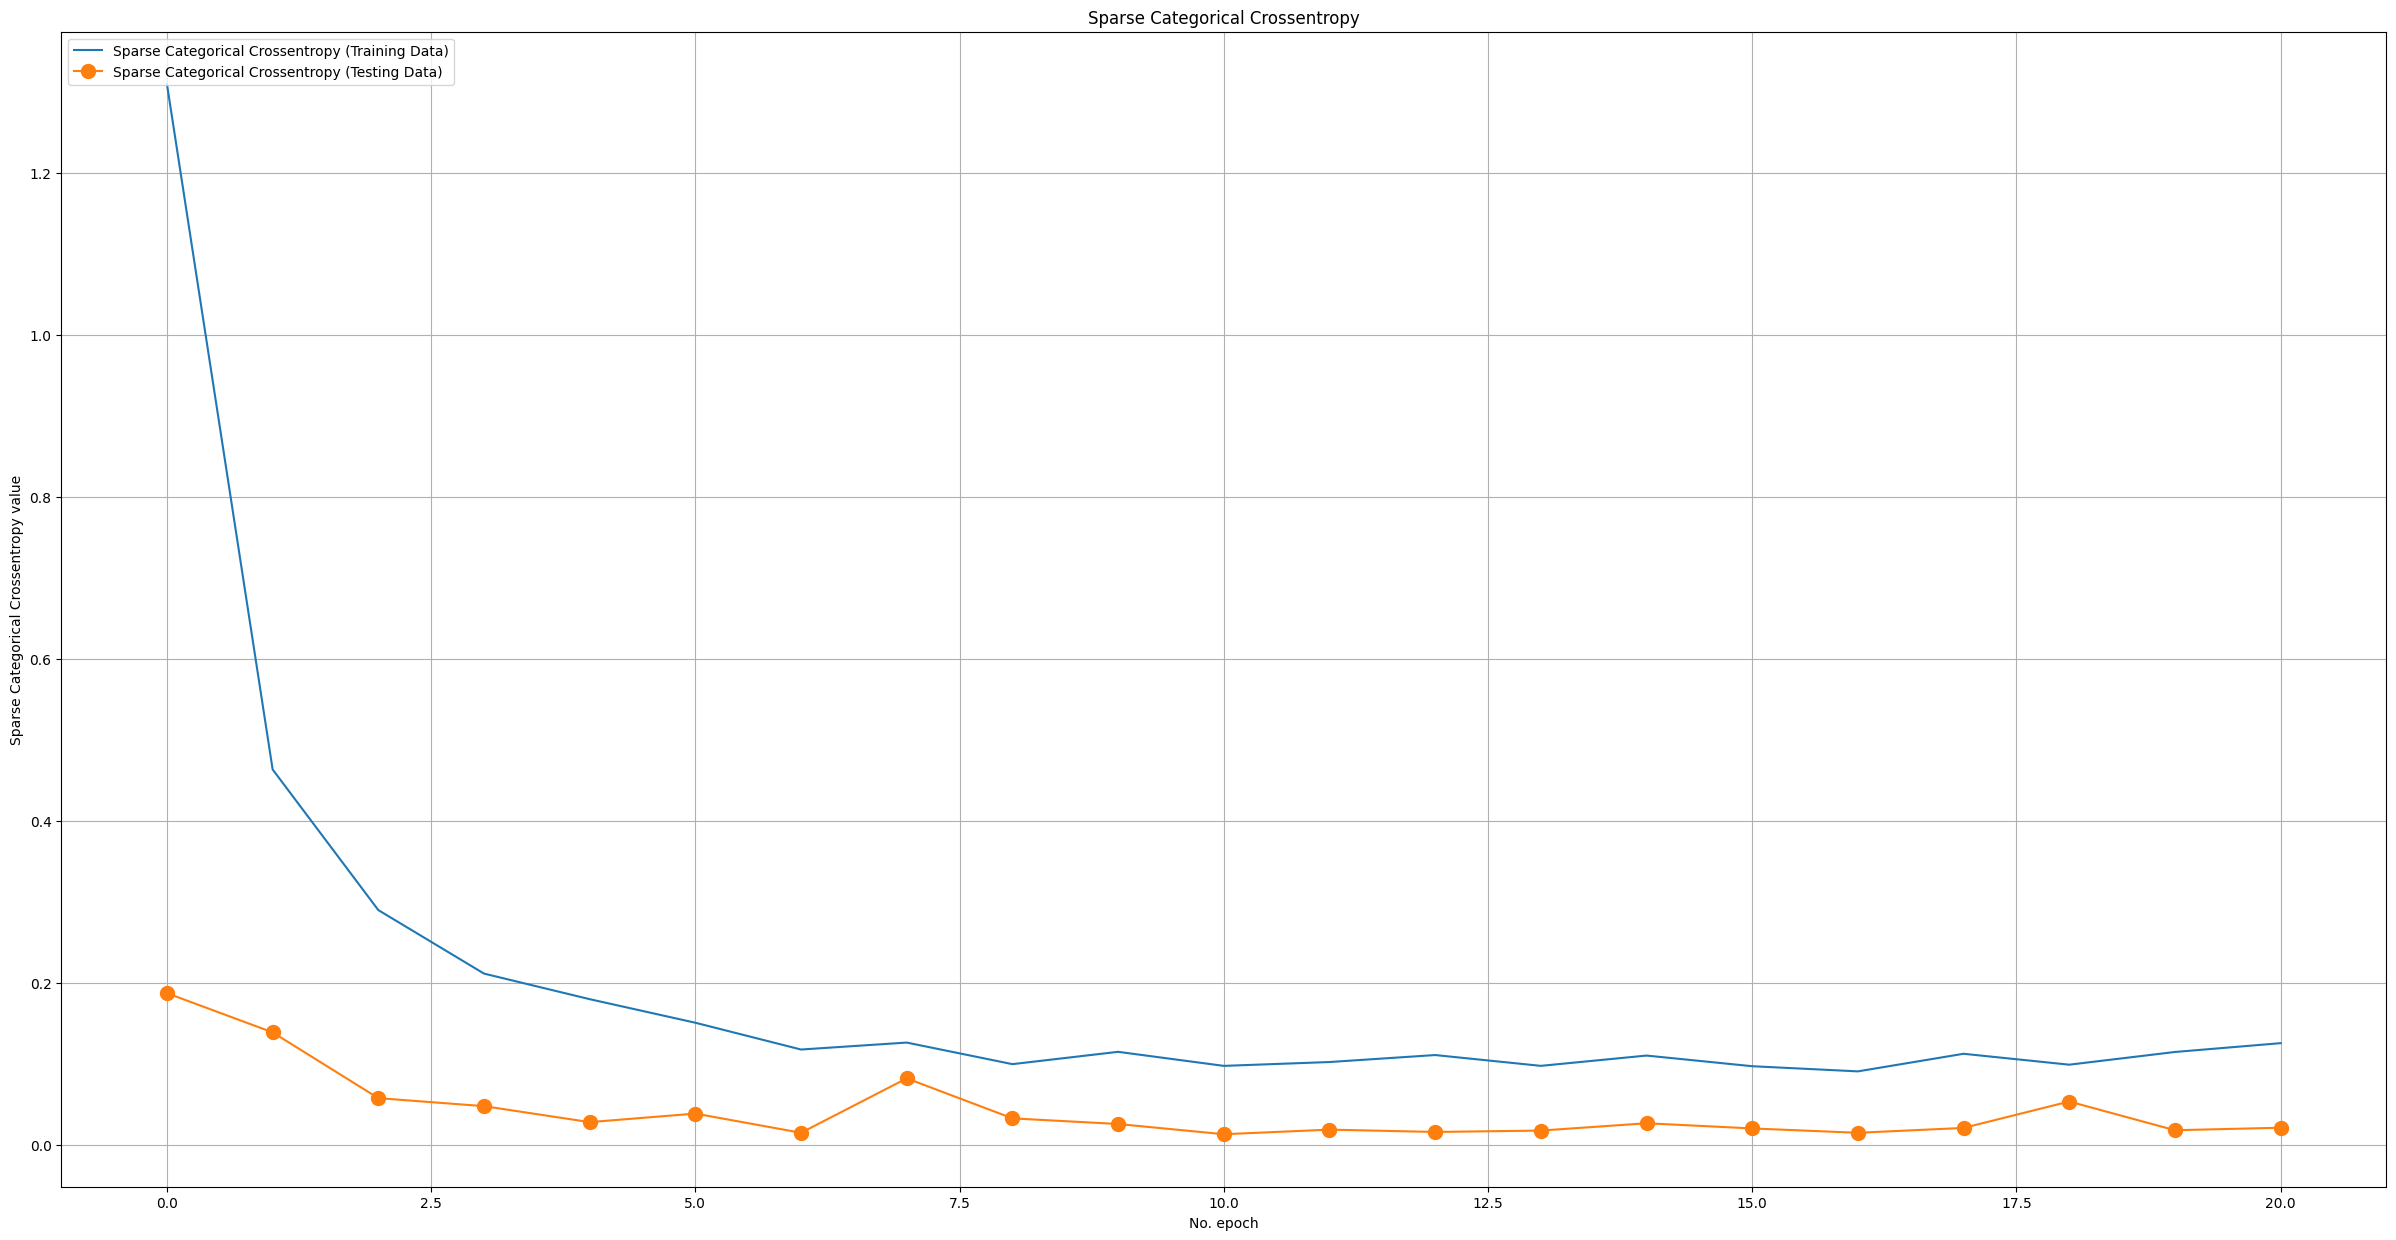

In [7]:
moStressNeuralNetwork.execute()

In [8]:
evaluator = EvaluateModel(
    moStressNeuralNetwork.model,
    moStressNeuralNetwork.modelFullName,
    { "features": validationData["features"], "targets": validationData["targets"] }
)

Evaluating MoStress with model: REGULARIZER-LSTM-RMSPROP

Classification Report

              precision    recall  f1-score   support

    Baseline     0.7100    0.6612    0.6847      8016
      Stress     0.6569    0.9193    0.7662      4523
   Amusement     0.4173    0.2010    0.2713      2423

    accuracy                         0.6647     14962
   macro avg     0.5947    0.5938    0.5741     14962
weighted avg     0.6465    0.6647    0.6424     14962



Confusion Matrix



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


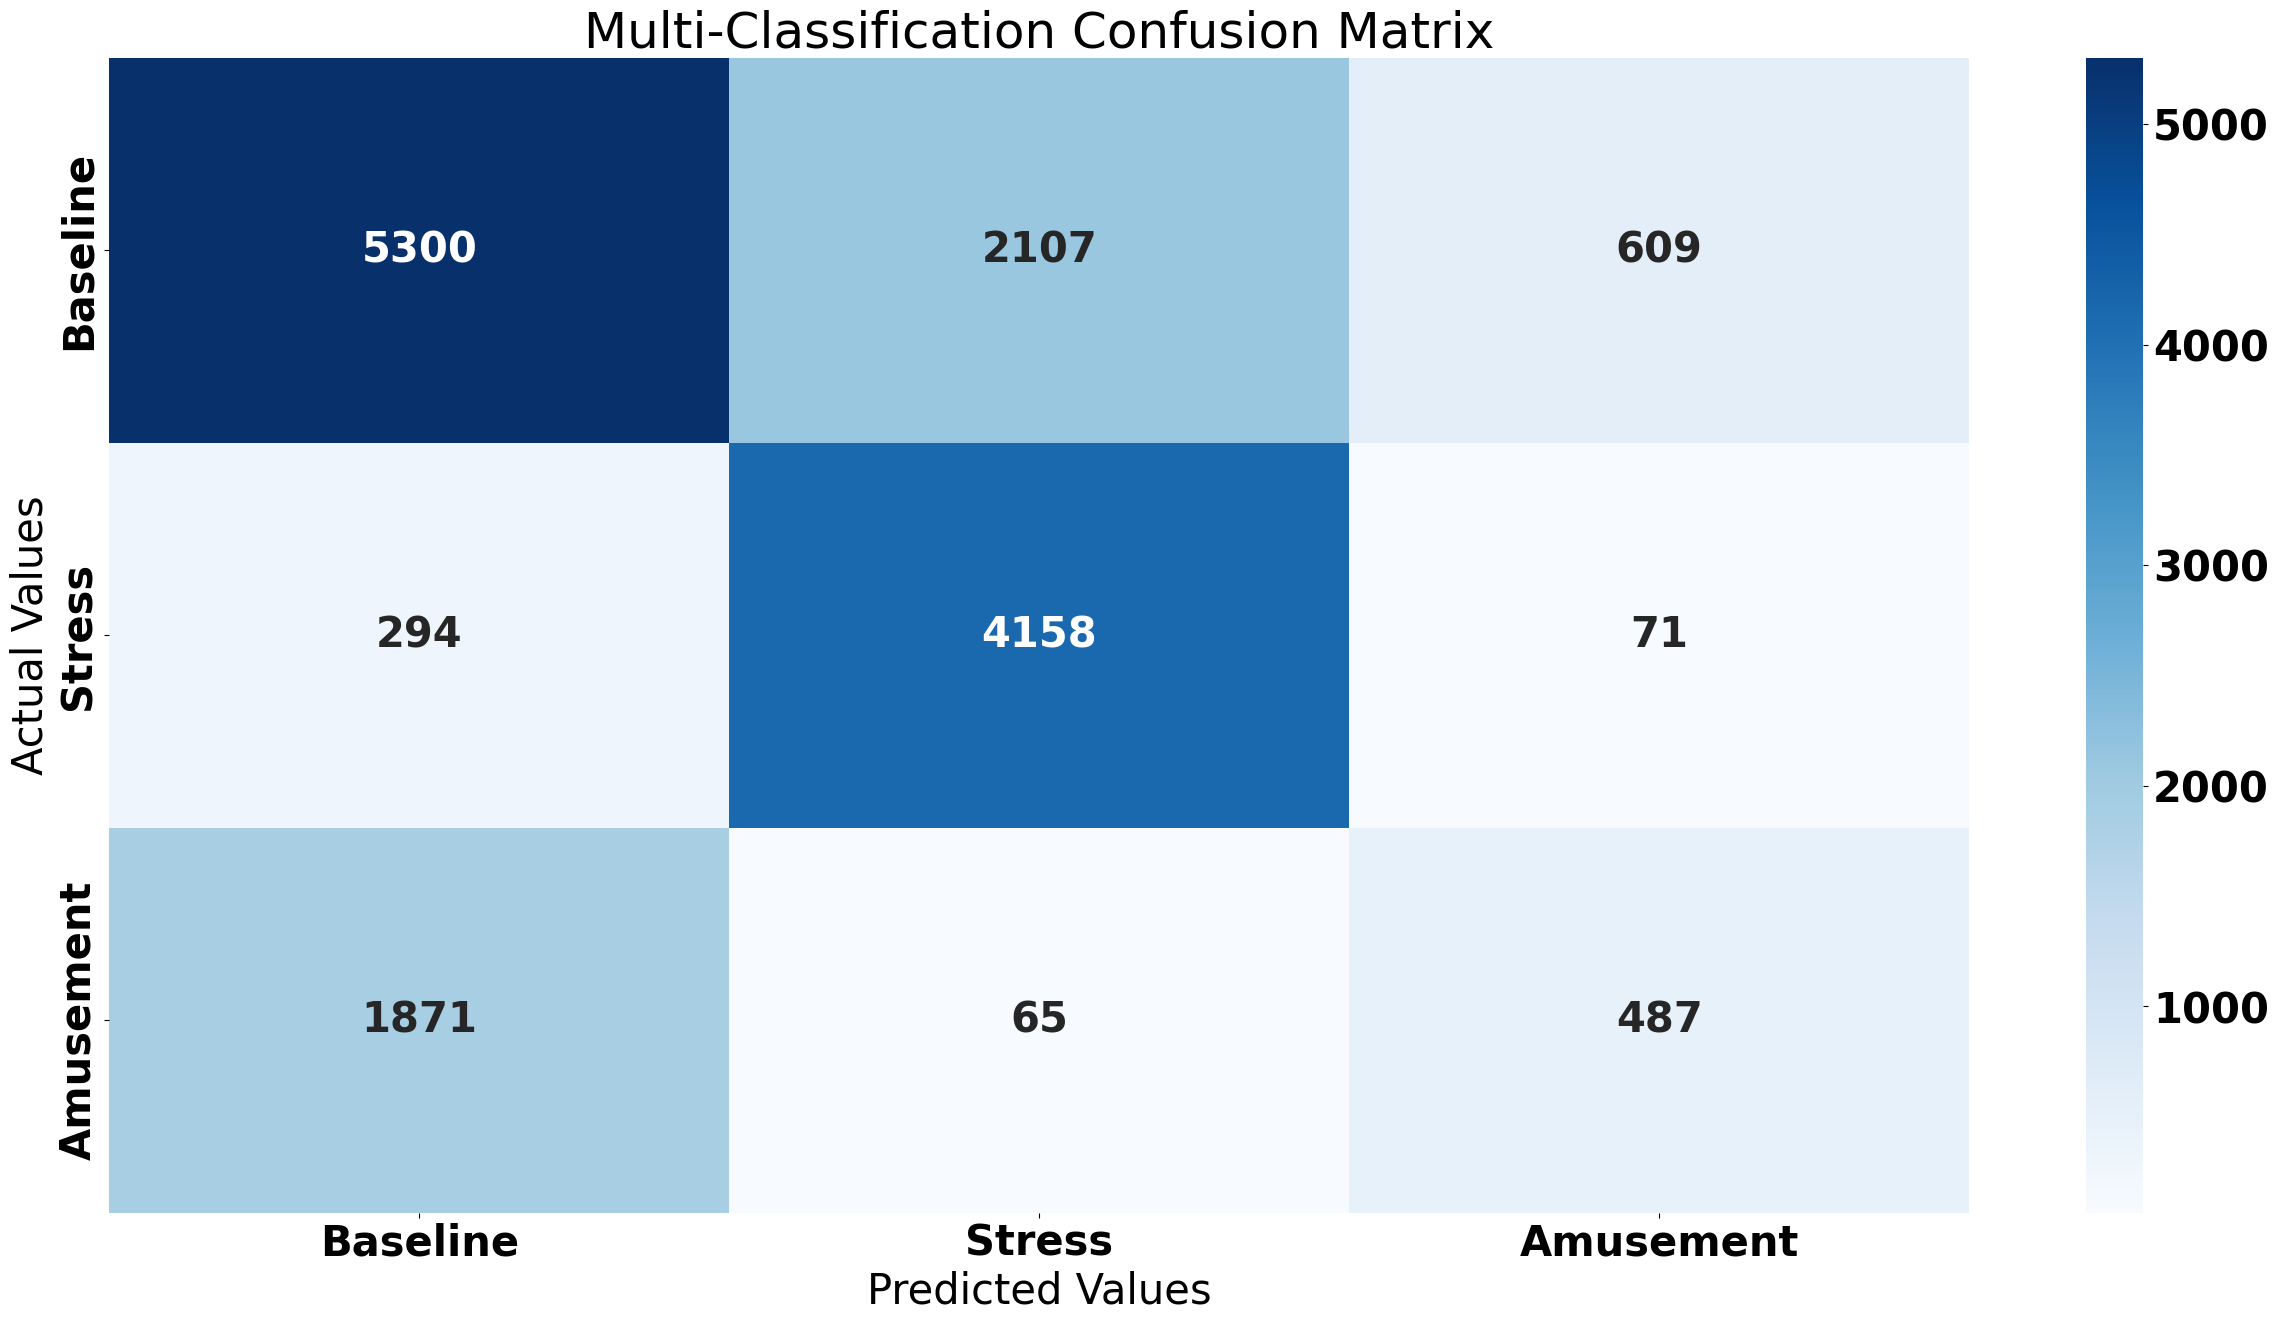

In [9]:
evaluator.executeEvaluation()